In [1]:
from __future__ import annotations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sbn
from typing import Any, List, Type
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from datetime import datetime
from sklearn.metrics import mean_squared_error
from timeseries import *
import time
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\t_tho\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\t_tho\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\t_tho\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\t_tho\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#df=pd.read_csv("ActonMay4.csv")
df = pd.read_csv('ActonMay4.csv', index_col=False, infer_datetime_format=True, parse_dates=[4, 5])

In [9]:
detector_sample=df["detector_id"].drop_duplicates().sample(10).to_numpy()

In [10]:
MA(df,'N25/011d2', 5)

188.33333333333334

In [5]:
MALD(df,"N24/012a1",24, 13)*24

1.5540348425339148

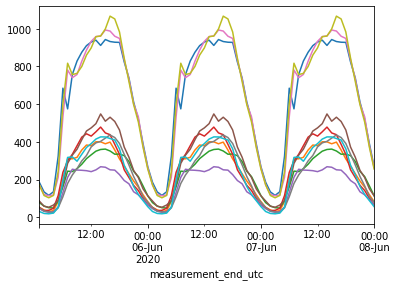

In [6]:
y=MALDforecast(df, 15, 3, display=True, detectors=detector_sample)

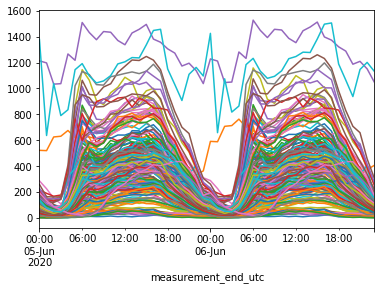

In [7]:
x=holt_winters(df, 15, 2, display=True, alpha=0.011964759098275513, beta=0.01322758270920145, gamma=0.29363083066992207)

In [8]:
CBL=count_baseline(df, 20, 2, alpha=0.011964759098275513, beta=0.01322758270920145, gamma=0.29363083066992207)

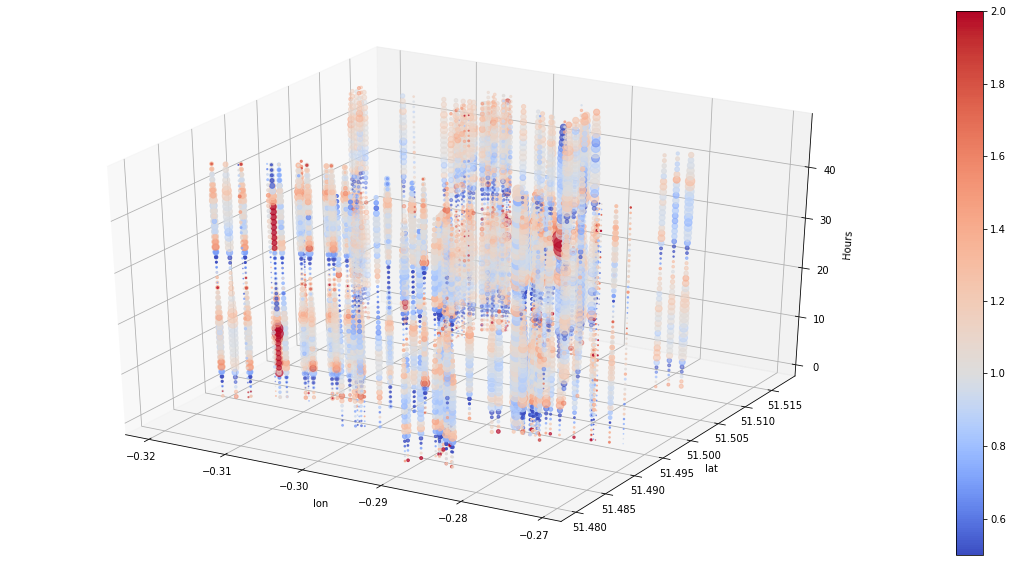

In [9]:
CB_plot(CBL)

In [8]:
detector_sample=df["detector_id"].drop_duplicates().sample(50).to_numpy()

In [9]:
detector_sample

array(['N27/228a1', 'N27/011a1', 'N27/044c1', 'N24/128x1', 'N25/117y1',
       'N25/263a1', 'N25/121a4', 'N24/128a1', 'N27/227p1', 'N27/044a1',
       'N25/117a4', 'N25/263b1', 'N27/169a1', 'N25/188m1', 'N27/016b1',
       'N27/018c1', 'N27/011f1', 'N25/117a3', 'N27/060b1', 'N25/124b1',
       'N27/093g1', 'N25/222b2', 'N25/286b1', 'N25/124a4', 'N25/117b1',
       'N25/042f1', 'N27/018f1', 'N25/011b1', 'N25/223a2', 'N27/265f1',
       'N25/006b1', 'N25/089r1', 'N27/019b1', 'N27/227n1', 'N24/128x2',
       'N24/012a1', 'N27/299a1', 'N25/009f1', 'N25/216e1', 'N27/020f1',
       'N24/130b1', 'N27/094e1', 'N24/128q1', 'N25/042h1', 'N25/039d1',
       'N25/006c1', 'N27/247x1', 'N25/011d1', 'N25/009a3', 'N25/216e2'],
      dtype=object)

In [10]:
df2=df[df["detector_id"]=='N25/009a1']
df2.index = df2["measurement_end_utc"]
#df2 = df2.resample('H')
#df.loc[:, ['Value', 'JD']] = df.loc[:, ['Value', 'JD']].interpolate(method='linear', limit_direction='both', limit=100)
#df.tail(25)
hours=df2.index.hour
for i in range(len(hours)):
    if(hours[i]-hours[i-1]>1):
        print(hours[i-1], hours[i])

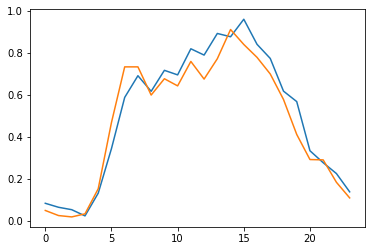

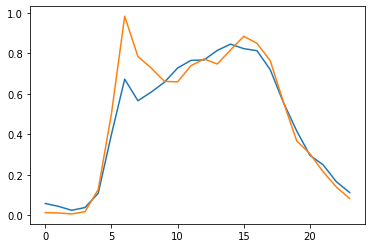

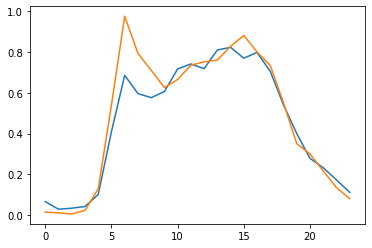

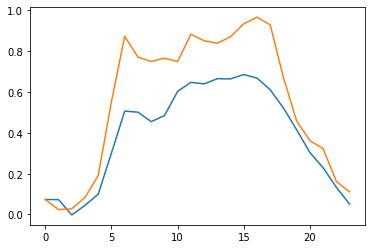

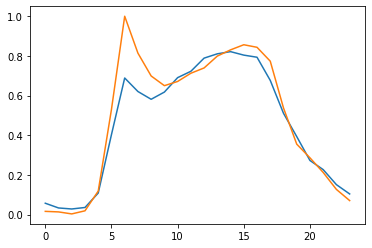

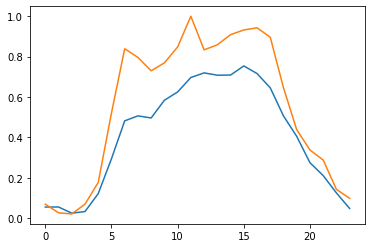

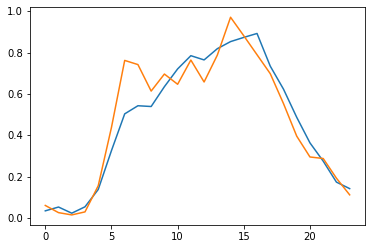

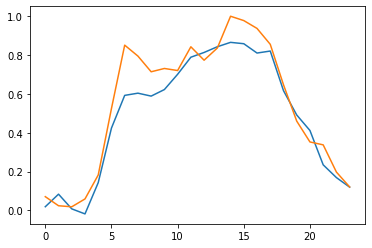

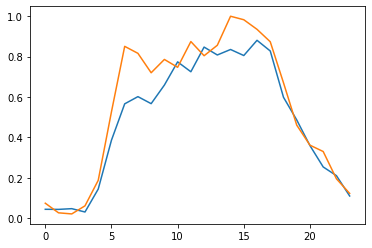

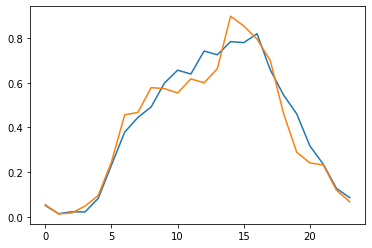

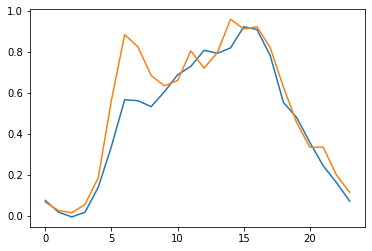

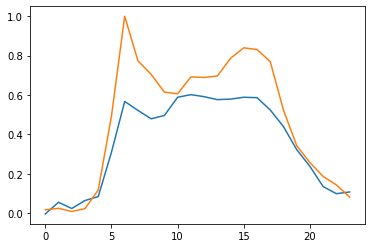

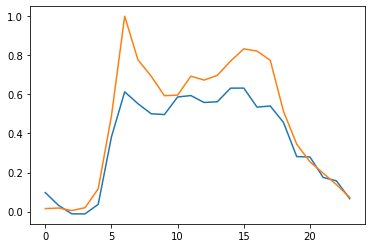

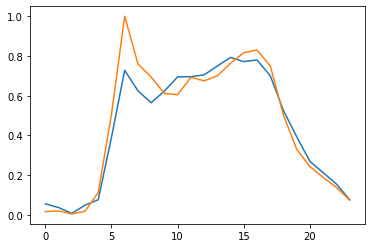

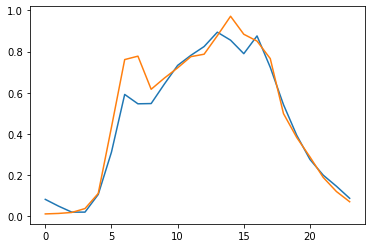

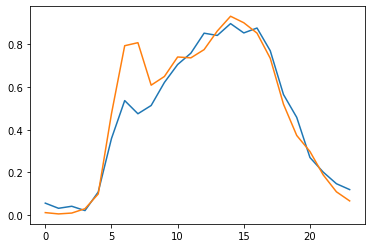

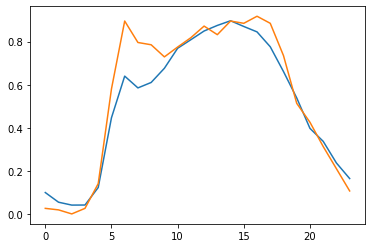

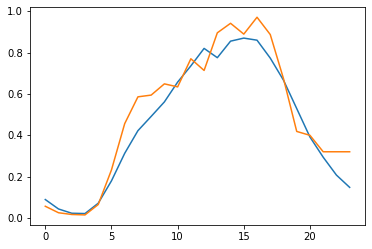

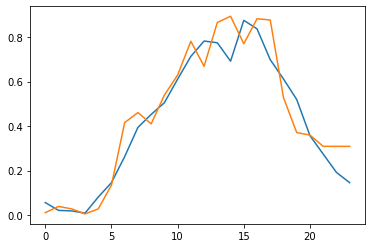

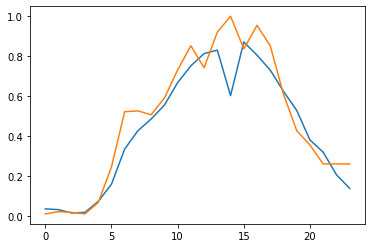

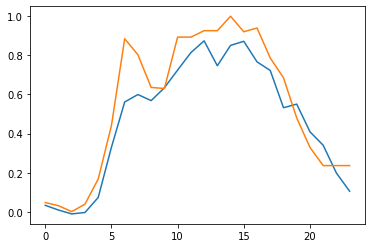

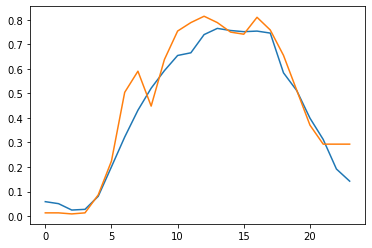

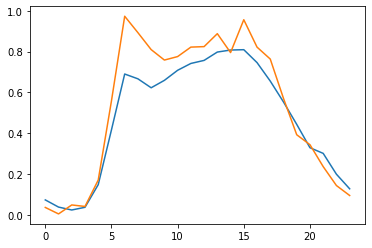

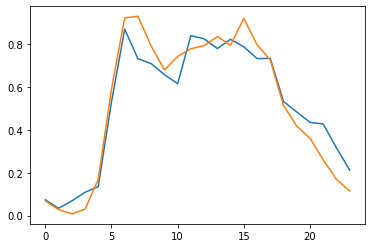

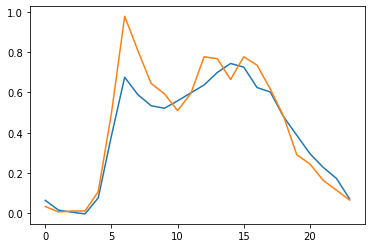

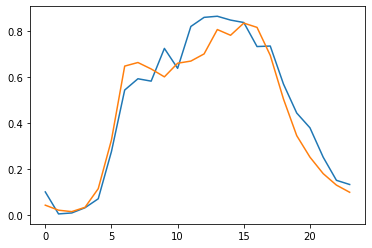

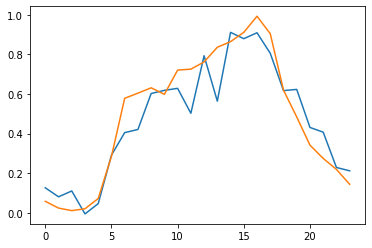

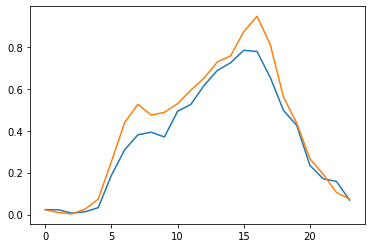

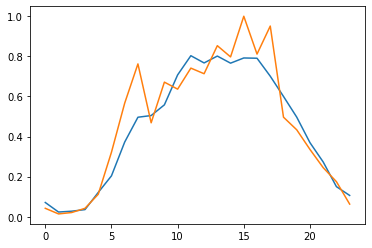

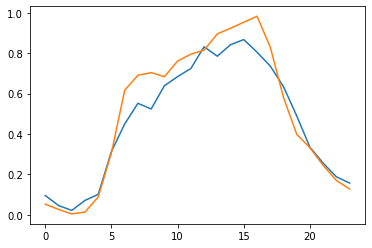

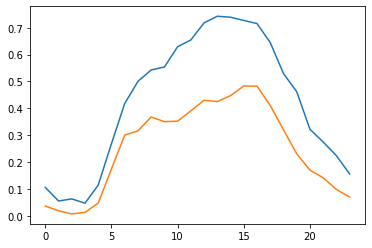

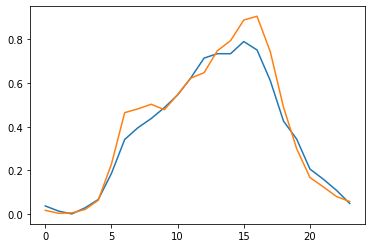

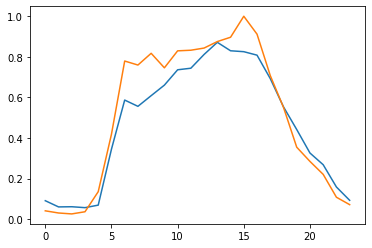

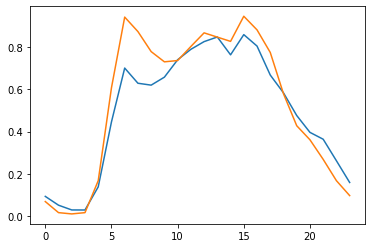

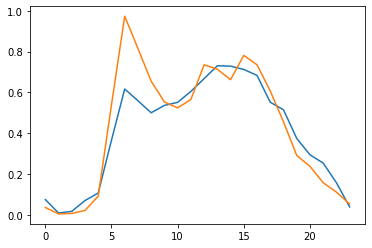

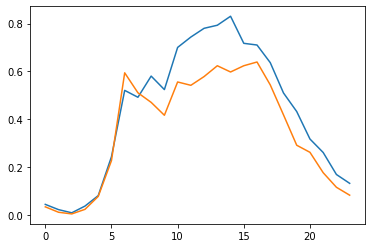

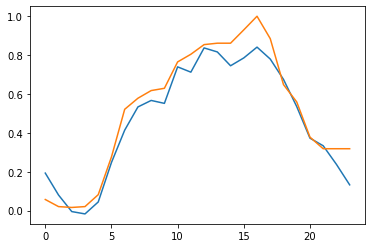

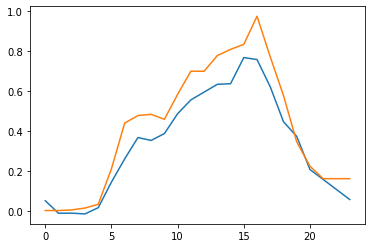

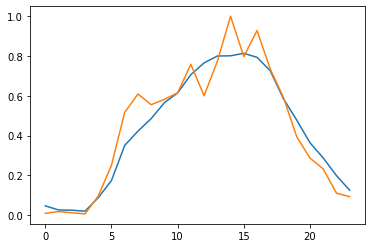

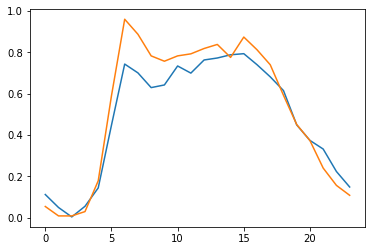

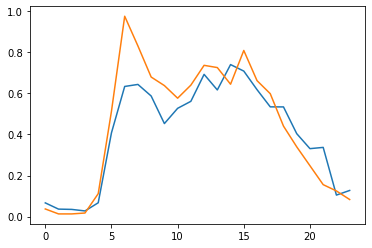

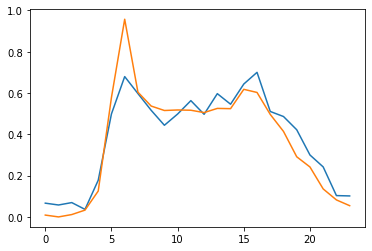

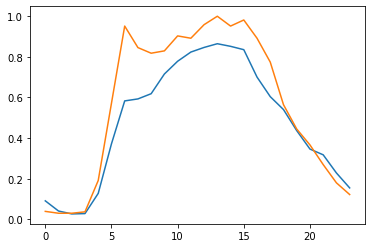

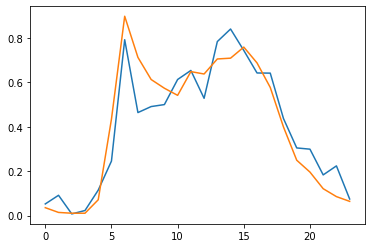

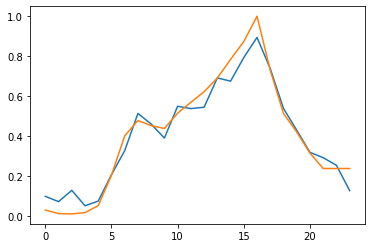

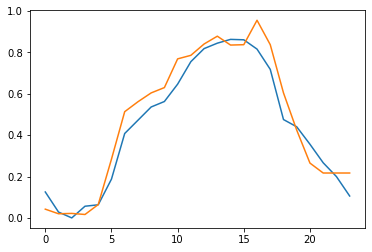

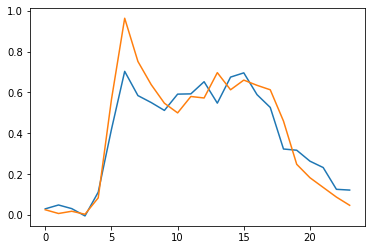

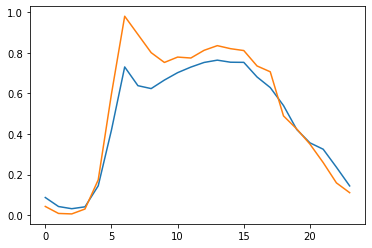

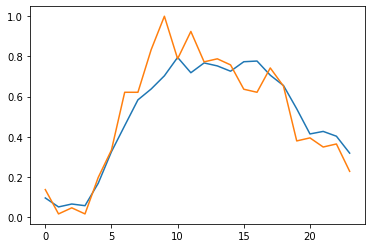

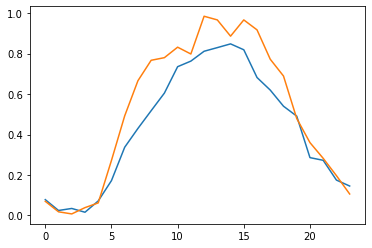

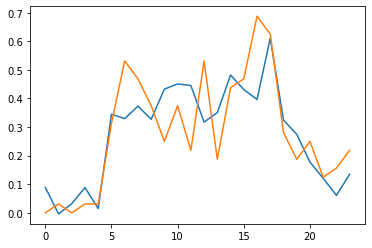

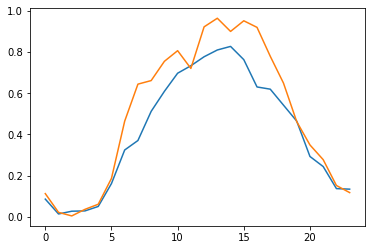

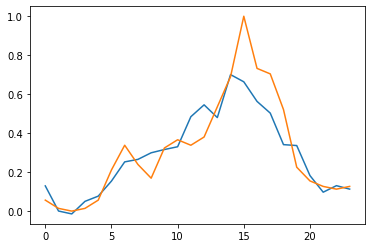

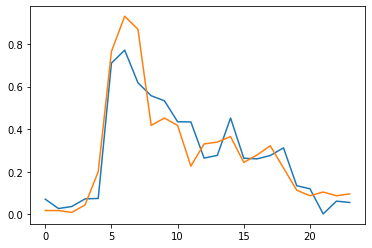

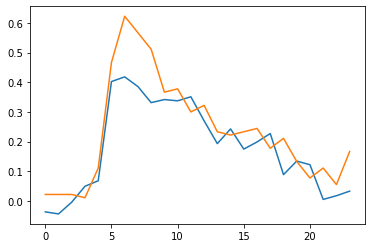

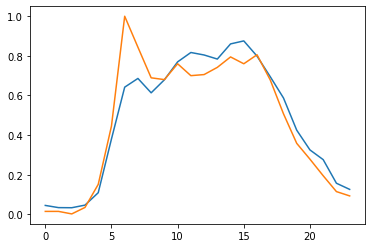

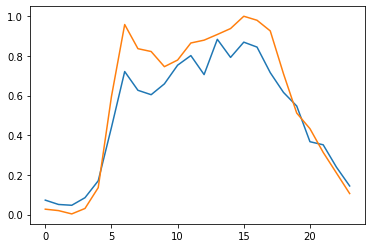

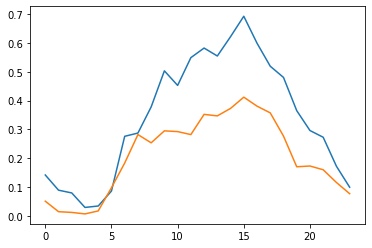

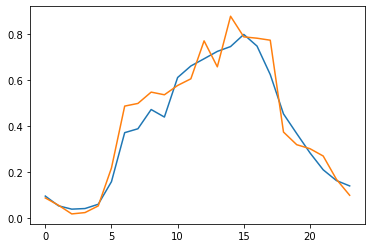

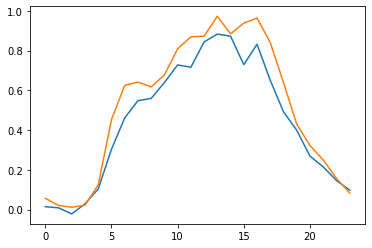

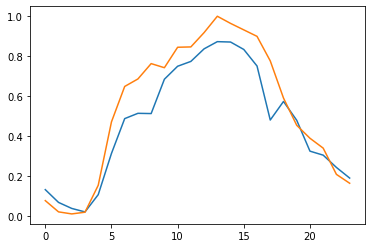

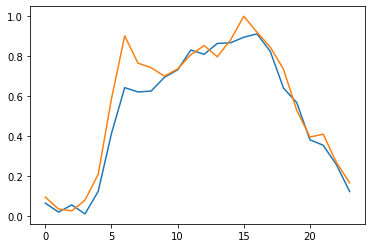

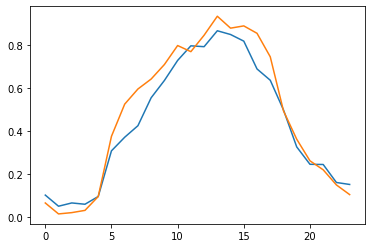

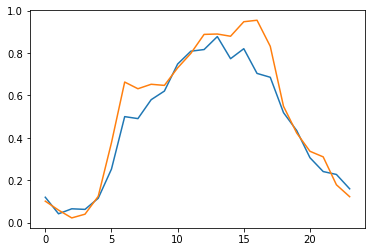

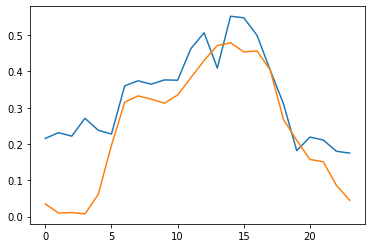

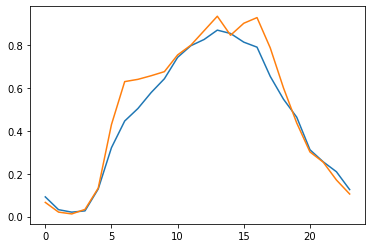

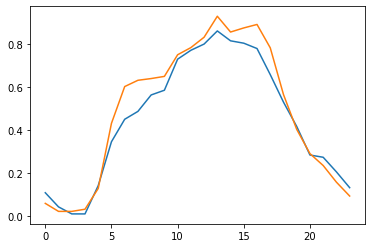

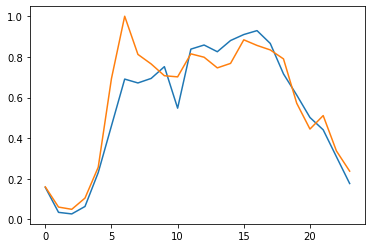

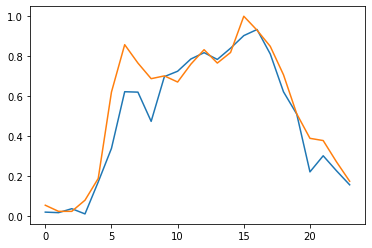

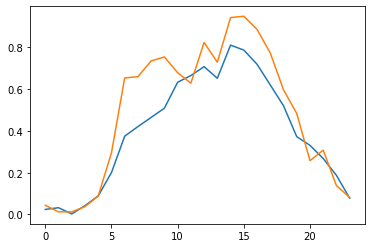

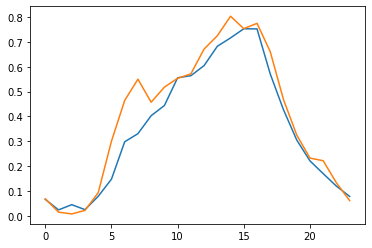

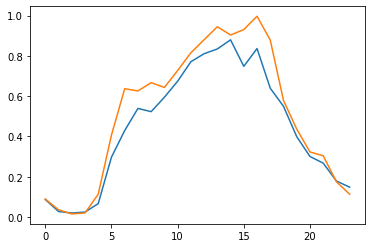

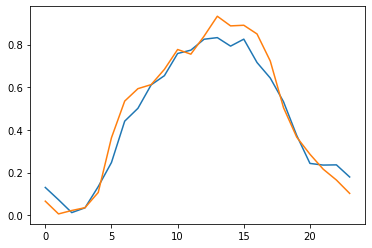

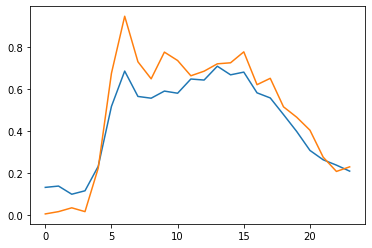

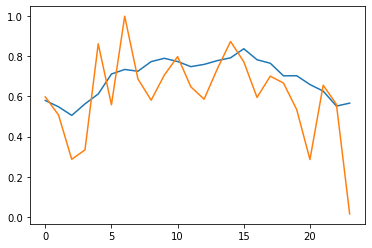

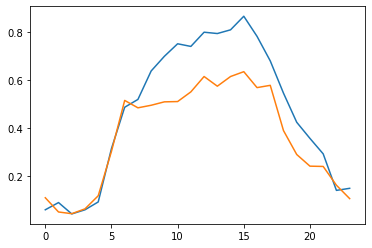

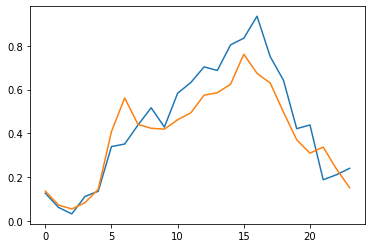

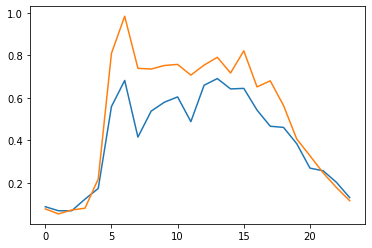

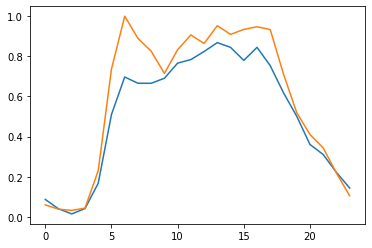

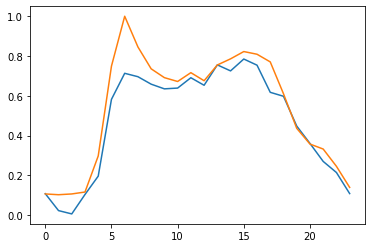

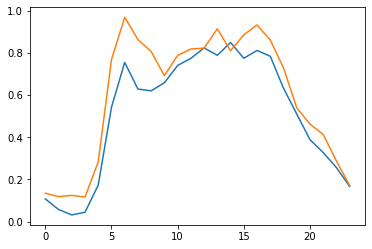

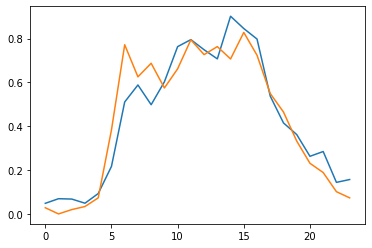

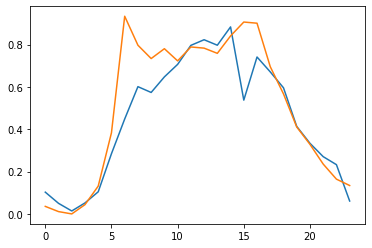

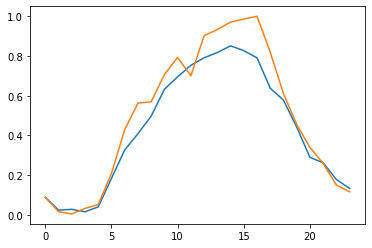

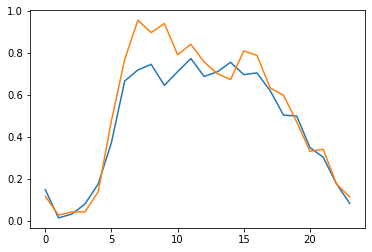

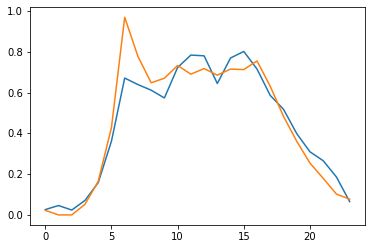

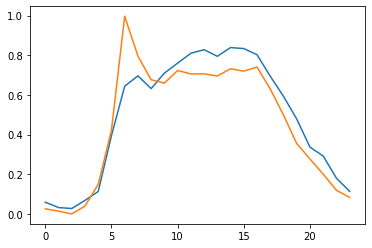

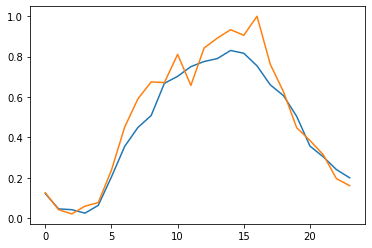

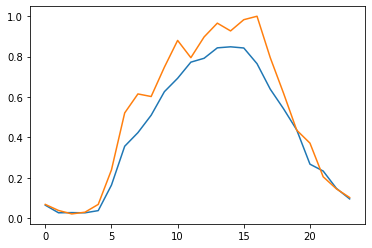

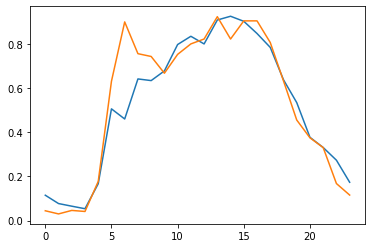

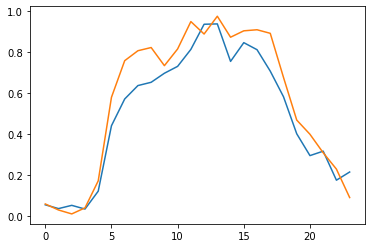

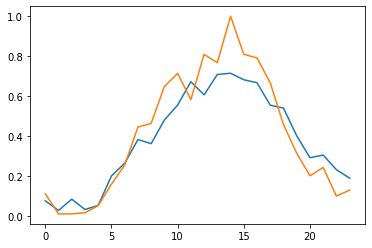

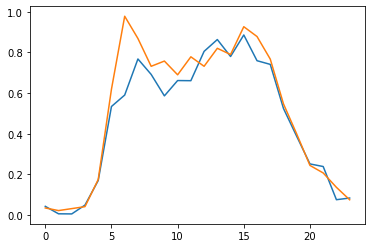

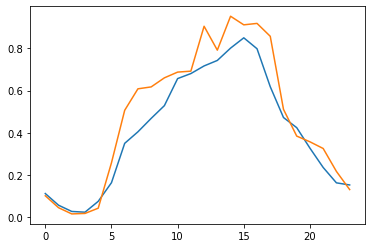

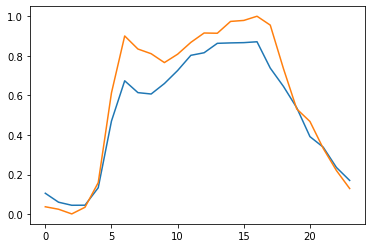

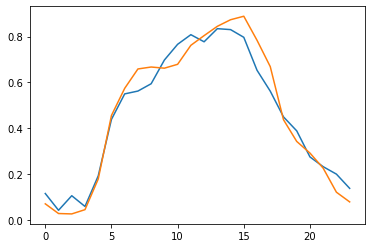

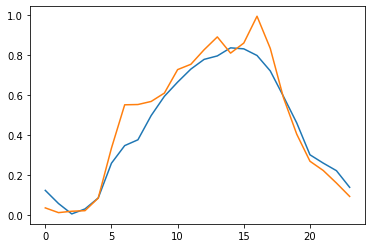

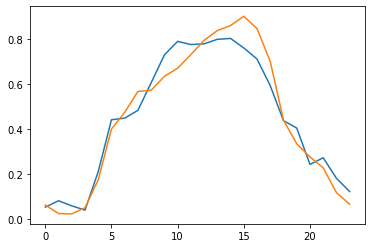

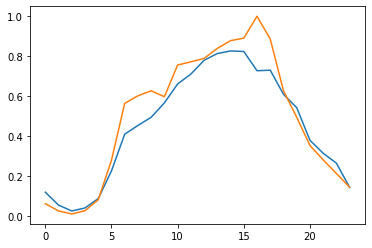

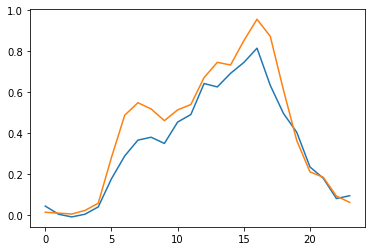

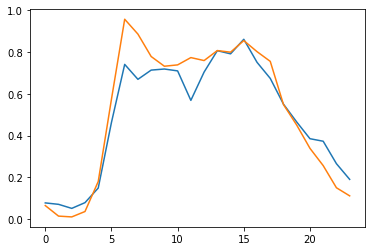

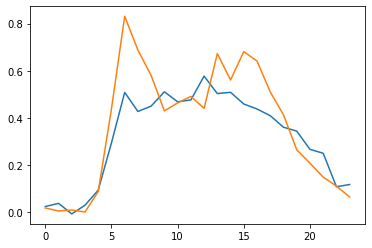

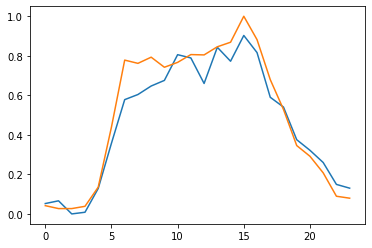

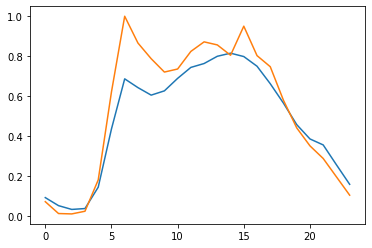

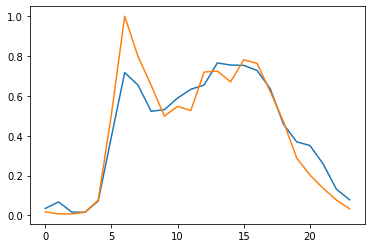

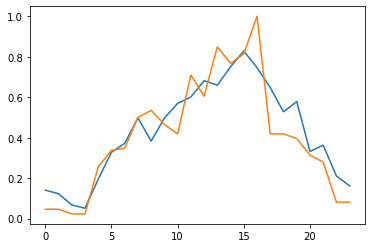

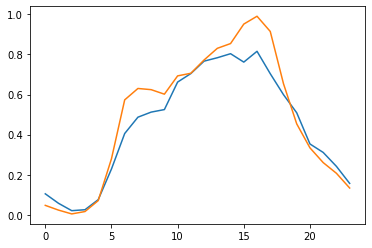

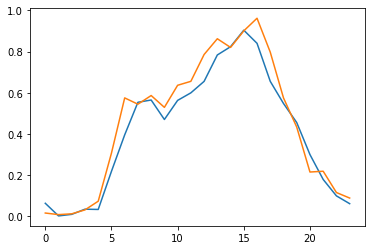

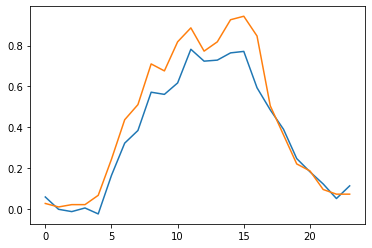

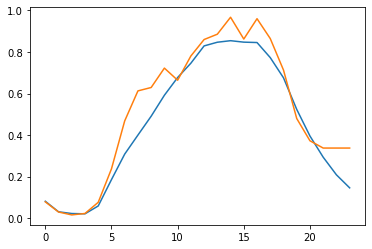

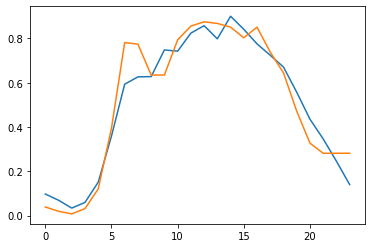

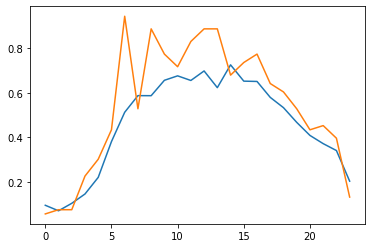

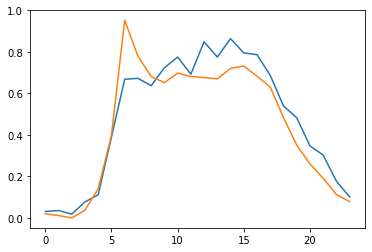

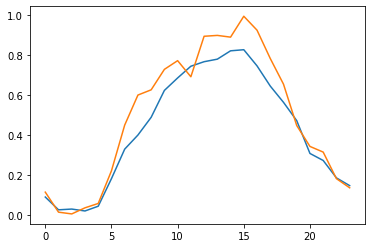

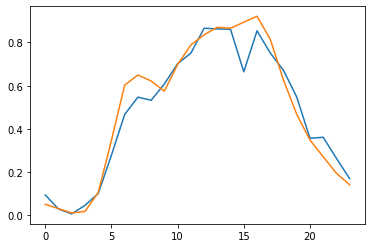

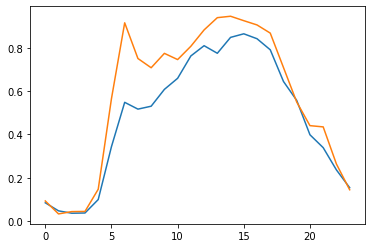

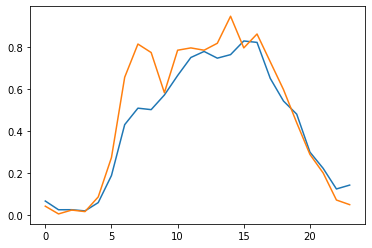

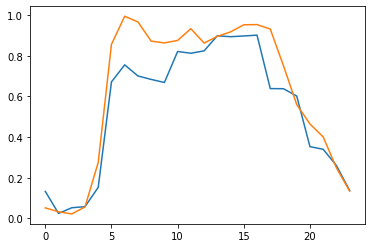

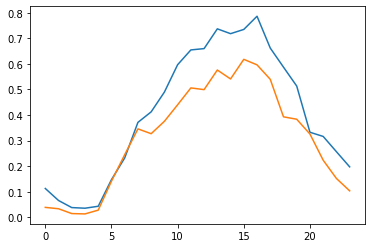

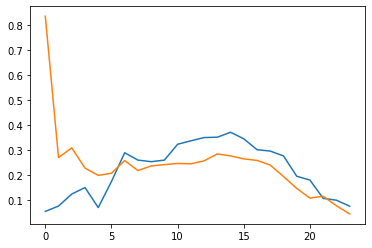

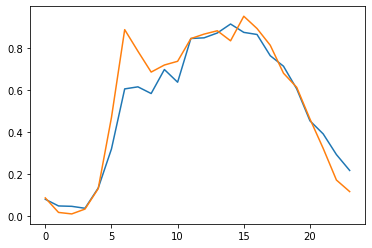

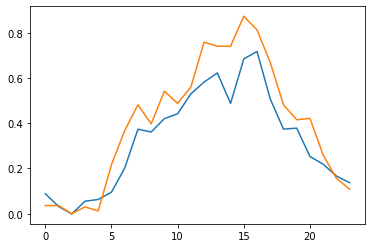

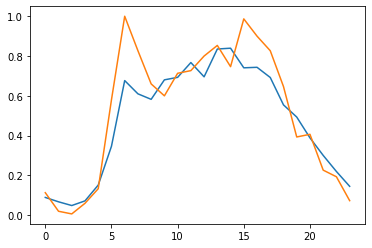

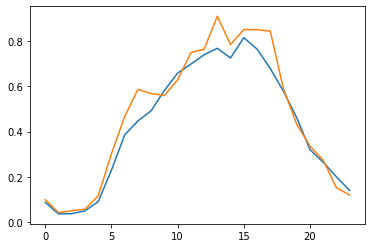

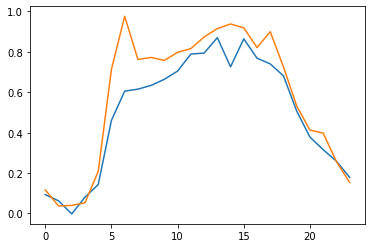

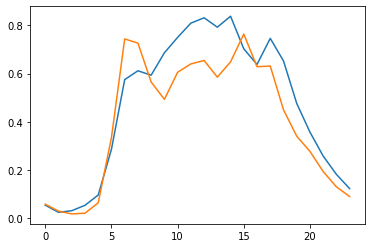

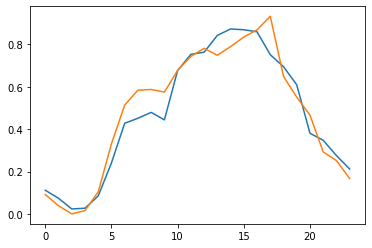

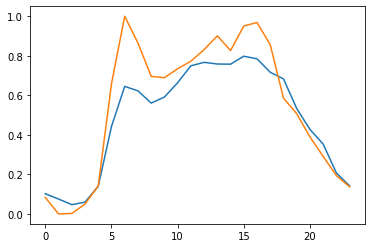

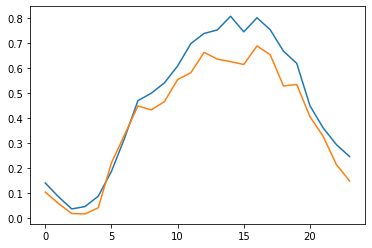

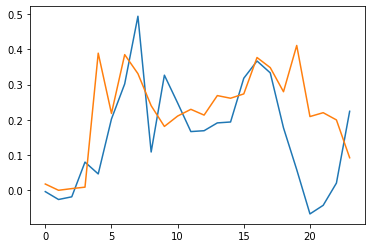

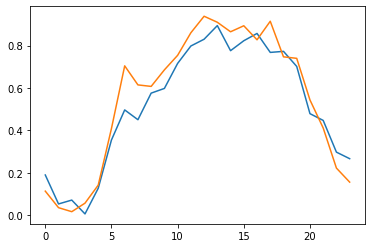

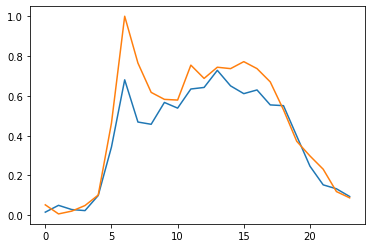

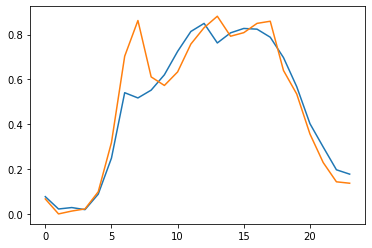

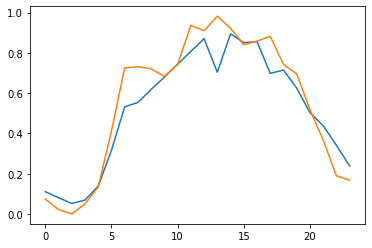

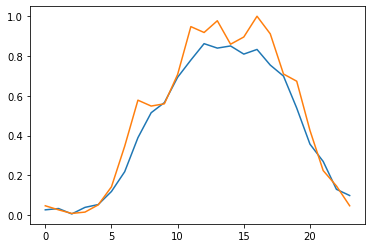

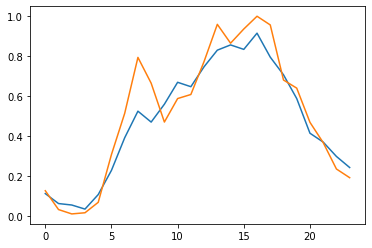

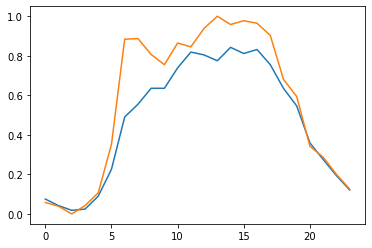

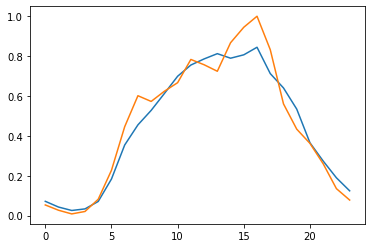

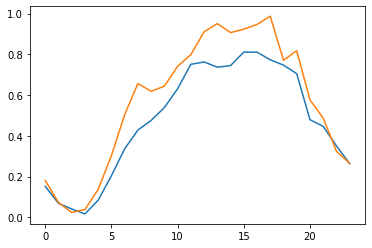

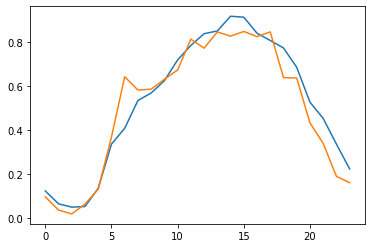

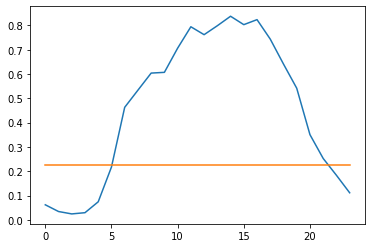

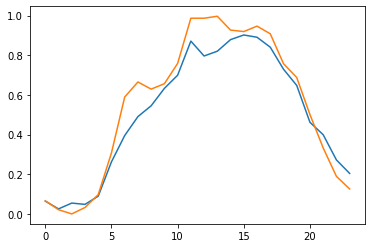

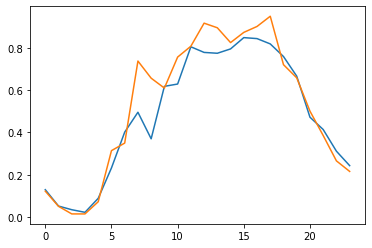

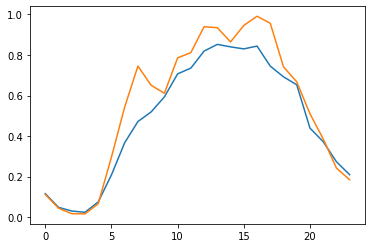

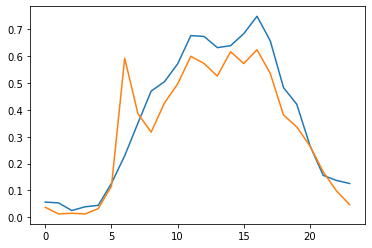

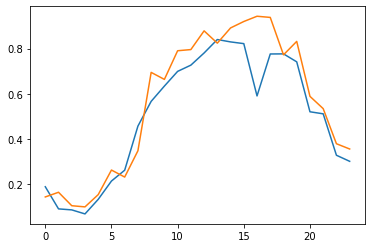

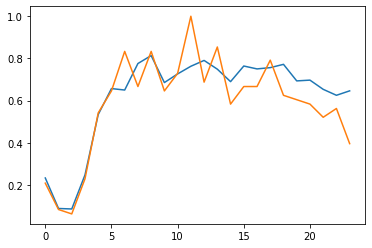

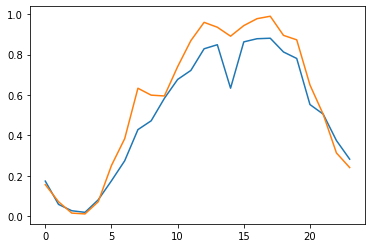

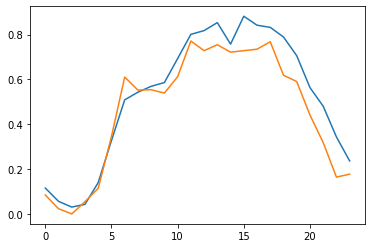

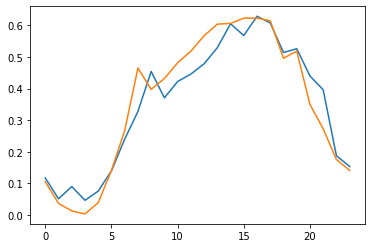

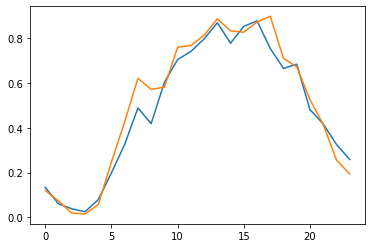

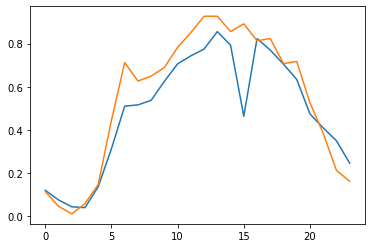

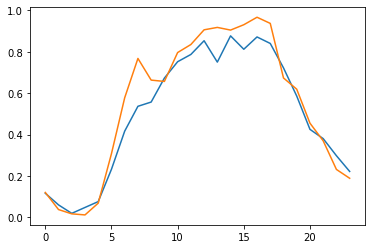

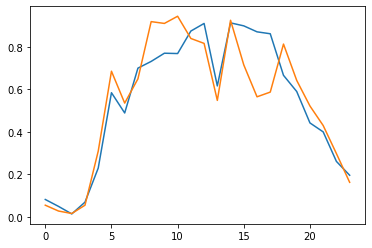

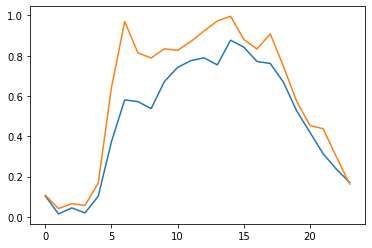

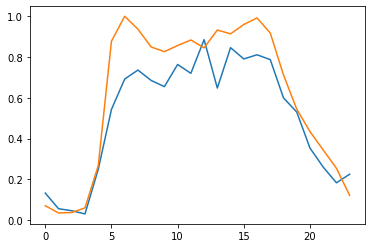

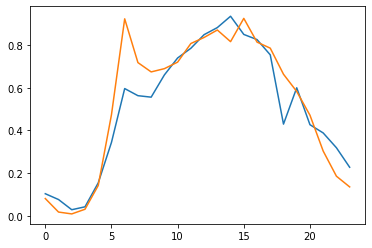

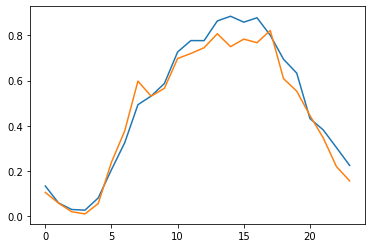

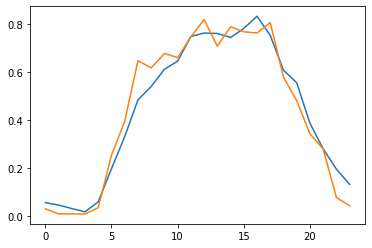

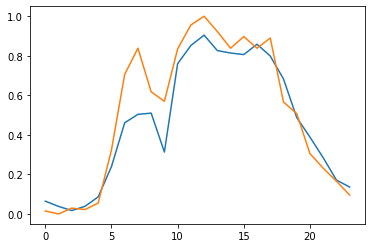

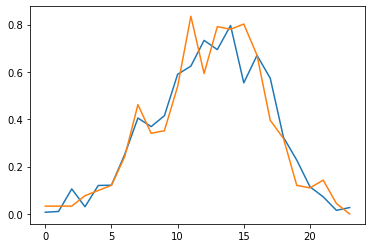

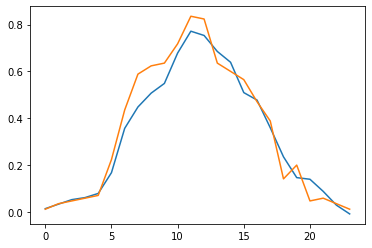

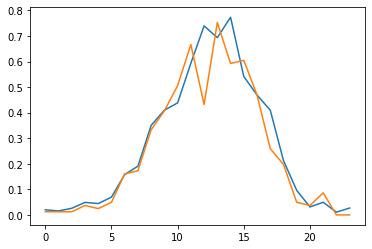

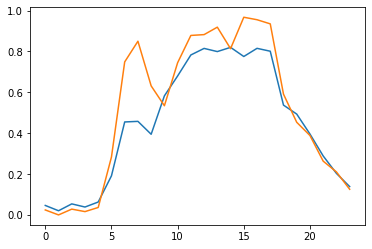

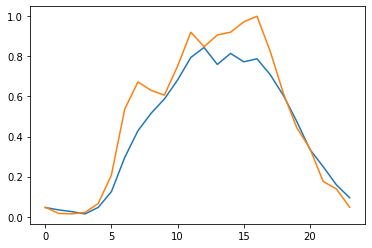

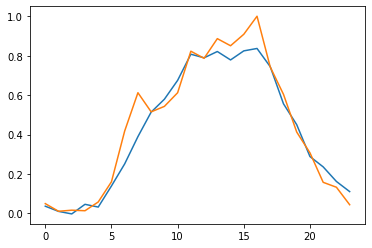

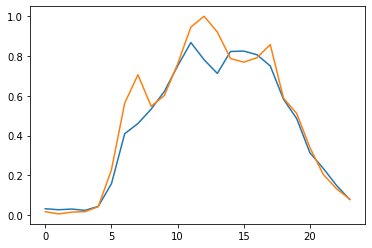

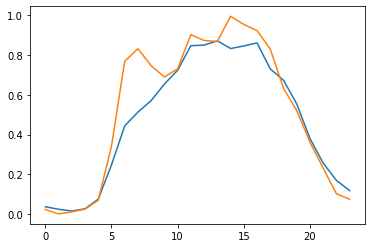

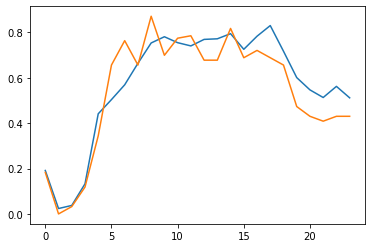

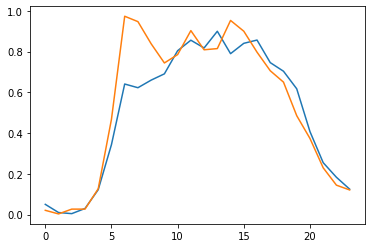

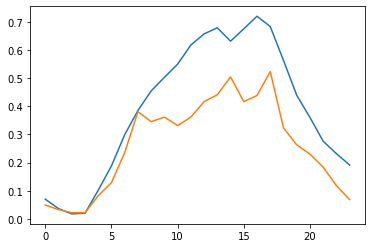

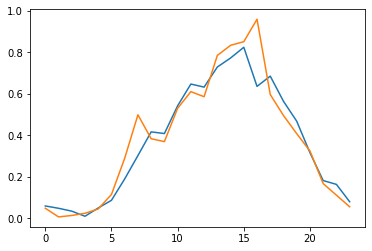

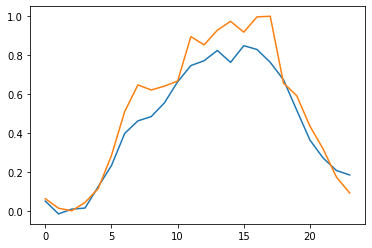

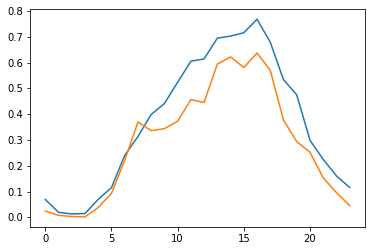

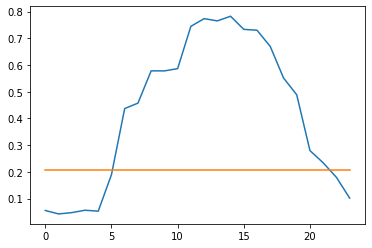

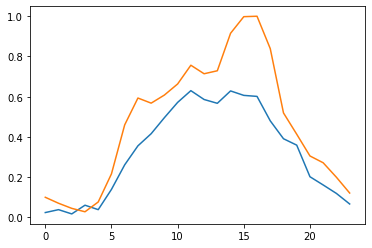

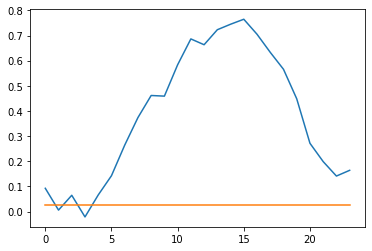

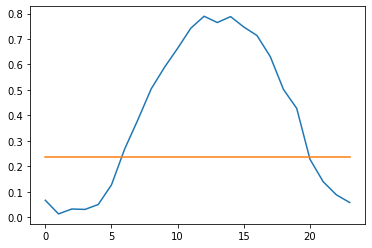

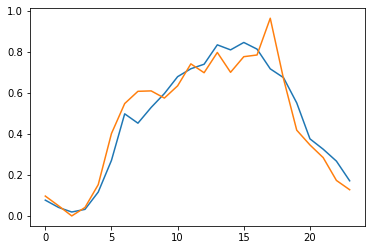

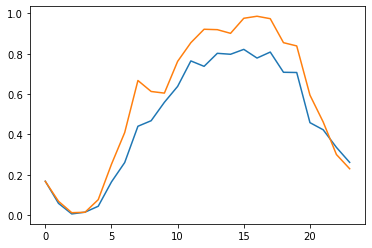

398.00579023361206


In [5]:
start_time = time.time()
LSTM_forecast(df, days_in_past=10, days_in_future=1)
print(time.time()-start_time)

In [9]:
X=df[df["detector_id"]=='N25/009a1']
X.index=X["measurement_end_utc"]
T=pd.date_range(start=X.index.min(), end=X.index.max(), freq='H')
Y = X.reindex(T)
Y["n_vehicles_in_interval"]=Y["n_vehicles_in_interval"].interpolate(method='linear', limit_direction='forward', axis=0)
Y["detector_id"]=Y["detector_id"].interpolate(method='pad', limit_direction='forward', axis=0)
Y["measurement_end_utc"]=Y.index

In [34]:
days_in_past=6
days_in_future=2
detectors=df["detector_id"].drop_duplicates().sample(10).to_numpy()
for detector in detectors:
        
        dataset=df[df["detector_id"]==detector]
        dataset.index=dataset["measurement_end_utc"]
        
        T=pd.date_range(start=df["measurement_end_utc"].min(), end=df["measurement_end_utc"].max(), freq='H')
        dataset = dataset.reindex(T)
        dataset["n_vehicles_in_interval"]=dataset["n_vehicles_in_interval"].interpolate(method='linear', limit_direction='forward', axis=0)
        dataset["detector_id"]=dataset["detector_id"].interpolate(method='pad', limit_direction='forward', axis=0)
        dataset["measurement_end_utc"]=dataset.index
        
        
        prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
                (days_in_future + days_in_past)* 24, "h"
            )
        dataset_train = dataset[dataset["measurement_end_utc"] <= prediction_start]
        dataset_test = dataset[dataset["measurement_end_utc"] > prediction_start]
        
        train=dataset_train["n_vehicles_in_interval"].to_numpy()
        test=dataset_test["n_vehicles_in_interval"].to_numpy()
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train.reshape(-1, 1))
        test = scaler.fit_transform(test.reshape(-1, 1))
        
        


        X_train, Y_train = create_dataset(train, look_back=days_in_past*24, look_forward=24*days_in_future)
        X_test, Y_test = create_dataset(test, look_back=days_in_past*24, look_forward=24*days_in_future)

In [52]:
def interpolator(df):
    detectors = df["detector_id"].drop_duplicates().to_numpy()
    df_list=[]
    for detector in detectors:
        dataset=df[df["detector_id"]==detector]
        dataset.index=dataset["measurement_end_utc"]
        
        T=pd.date_range(start=df["measurement_end_utc"].min(), end=df["measurement_end_utc"].max(), freq='H')
        dataset = dataset.reindex(T)
        dataset["n_vehicles_in_interval"]=dataset["n_vehicles_in_interval"].interpolate(method='linear', limit_direction='forward', axis=0)
        dataset["detector_id"]=dataset["detector_id"].interpolate(method='pad', limit_direction='forward', axis=0)
        dataset["lon"]=dataset["lon"].interpolate(method='pad', limit_direction='forward', axis=0)
        dataset["lat"]=dataset["lat"].interpolate(method='pad', limit_direction='forward', axis=0)
        dataset["measurement_end_utc"]=dataset.index
        dataset["measurement_start_utc"]=dataset["measurement_end_utc"]-+ np.timedelta64(1, "h")
        df_list.append(dataset)
        
    DF = pd.concat(df_list)
    
    return DF.reset_index(drop=True)

In [53]:
df2=interpolator(df)

In [54]:
len(df2)/(24*31)

180.0

In [129]:
days_in_past=7
days_in_future=2

df2=interpolator(df)
T=pd.date_range(start=df["measurement_end_utc"].min(), end=df["measurement_end_utc"].max(), freq='H')
df2[df2["measurement_end_utc"]==T[5]]["n_vehicles_in_interval"].to_numpy()


prediction_start = df2["measurement_end_utc"].iloc[-1] - np.timedelta64(
                (days_in_future + days_in_past)* 24, "h"
            )

dataset_train =[]
dataset_test = []
for t in T:
    N_t=df2[df2["measurement_end_utc"]==t]["n_vehicles_in_interval"].to_numpy()
    
    if(t <= prediction_start):
        dataset_train.append(N_t)
    
    elif(t>prediction_start):
        dataset_test.append(N_t)


dataset_train = np.array(dataset_train)
dataset_test = np.array(dataset_test)

def create_dataset(dataset, look_back=24, look_forward=24):
    dataX, dataY = [], []
    for i in range(0, len(dataset)-look_back-look_forward + 1, look_forward):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        b = dataset[(i+look_back):(i+look_back+look_forward)]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

X_train, Y_train = create_dataset(dataset_train, look_back=days_in_past*24, look_forward=24*days_in_future)
X_test, Y_test = create_dataset(dataset_test, look_back=days_in_past*24, look_forward=24*days_in_future)
    

In [130]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1],  X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], X_test.shape[2]))
X_train.shape

(7, 1, 168, 180)

In [132]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 24*days_in_past, 180)))
model.add(Dense(24*days_in_future*180))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=40, batch_size=1, verbose=0)

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


ValueError: Input 0 is incompatible with layer lstm_85: expected ndim=3, found ndim=4

In [103]:
dataset_train[:24*days_in_past].shape

(168, 180)

In [112]:
X_test.shape

(1, 168, 180)

In [53]:
days_in_past=7
days_in_future=2
        
prediction_start = Y["measurement_end_utc"].iloc[-1] - np.timedelta64(
        (days_in_future + days_in_past)* 24, "h"
    )
dataset_train = Y[Y["measurement_end_utc"] <= prediction_start]
dataset_test = Y[Y["measurement_end_utc"] > prediction_start]

dataset_test
        

Unnamed: 0 detector_id      lon        lat  \
2020-05-27 01:00:00     16854.0   N25/009a1 -0.31139  51.489148   
2020-05-27 02:00:00     16855.0   N25/009a1 -0.31139  51.489148   
2020-05-27 03:00:00     16856.0   N25/009a1 -0.31139  51.489148   
2020-05-27 04:00:00     16857.0   N25/009a1 -0.31139  51.489148   
2020-05-27 05:00:00     16858.0   N25/009a1 -0.31139  51.489148   
...                         ...         ...      ...        ...   
2020-06-04 20:00:00     17064.0   N25/009a1 -0.31139  51.489148   
2020-06-04 21:00:00     17065.0   N25/009a1 -0.31139  51.489148   
2020-06-04 22:00:00     17066.0   N25/009a1 -0.31139  51.489148   
2020-06-04 23:00:00     17067.0   N25/009a1 -0.31139  51.489148   
2020-06-05 00:00:00     17068.0   N25/009a1 -0.31139  51.489148   

                    measurement_start_utc measurement_end_utc  \
2020-05-27 01:00:00   2020-05-27 00:00:00 2020-05-27 01:00:00   
2020-05-27 02:00:00   2020-05-27 01:00:00 2020-05-27 02:00:00   
2020-05-27 03:00:00   2020-05-27 02:00:00 2020-05-27 03:00:00   
2020-05-27 04:00:00   2020-05-27 03:00:00 2020-05-27 04:00:00   
2020-05-27 05:00:00   2020-05-27 04:00:00 2020-05-27 05:00:00   
...                                   ...                 ...   
2020-06-04 20:00:00   2020-06-04 19:00:00 2020-06-04 20:00:00   
2020-06-04 21:00:00   2020-06-04 20:00:00 2020-06-04 21:00:00   
2020-06-04 22:00:00   2020-06-04 21:00:00 2020-06-04 22:00:00   
2020-06-04 23:00:00   2020-06-04 22:00:00 2020-06-04 23:00:00   
2020-06-05 00:00:00   2020-06-04 23:00:00 2020-06-05 00:00:00   

                     n_vehicles_in_interval  
2020-05-27 01:00:00                    37.0  
2020-05-27 02:00:00                    27.0  
2020-05-27 03:00:00                    24.0  
2020-05-27 04:00:00                    19.0  
2020-05-27 05:00:00                    82.0  
...                                     ...  
2020-06-04 20:00:00                   173.0  
2020-06-04 21:00:00                   153.0  
2020-06-04 22:00:00                   109.0  
2020-06-04 23:00:00                    71.0  
2020-06-05 00:00:00                    51.0  

[216 rows x 7 columns]

In [508]:
def CB(
    df: pd.DataFrame,
    days_in_past: int,
    days_in_future: int,

    detectors: list = None,
    alpha=0.06,
    beta=0.02,
    gamma=0.6,
):

    """Produces a DataFrame where the count and baseline can be compared for use
        in scan statistics

    Args: 
        df: Dataframe of SCOOT data
        detectors: List of detectors to look at
        days_in_past: Integer past days to train forecast one
        days_in_future: Days in future produce a baseline too and record count for
        method: Forecast method to use for baseline, default is "HW" for Holt-Winters, option for MLAD

    Returns:
        Dataframe of counts and baseline along with detector data

        """

    if detectors is None:
        detectors = df["detector_id"].drop_duplicates().to_numpy()

    prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
        days_in_future * 24, "h"
    )

    train_data = df[df["measurement_end_utc"] <= prediction_start]
    test_data = df[df["measurement_end_utc"] > prediction_start]
    y = holt_winters(
        train_data,
        days_in_past,
        days_in_future,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
        detectors=detectors,
    )
    
    sd = []

    for detector in detectors:

        sd.append(test_data[test_data["detector_id"] == detector])

    sample_test_data = pd.concat(sd)

    Y = y.merge(
        sample_test_data,
        on=[
            "lon",
            "lat",
            "measurement_end_utc",
            "detector_id",
            "measurement_start_utc",
        ]
    )
    Y = Y.rename(
        columns={
            "n_vehicles_in_interval_x": "baseline",
            "n_vehicles_in_interval_y": "count",
        }
    )

    return Y

In [19]:
def gradient_decent(df, alpha=0.011964759098275513, beta=0.01322758270920145, gamma=0.29363083066992207):
    MSE=10000
    while(MSE>3700):
        step_vector=[0.001, 0.0013, 0.02]
        CBL=count_baseline(df, 20, 2, alpha=alpha, beta=beta, gamma=gamma)
        CBL=CBL.dropna()
        MSE=mean_squared_error(CBL["count"], CBL["baseline"])
        print(MSE)
        CBL=count_baseline(df, 20, 2, alpha=alpha+0.0001, beta=beta, gamma=gamma)
        CBL=CBL.dropna()
        MSE2=mean_squared_error(CBL["count"], CBL["baseline"])
        alpha_diff=MSE2-MSE
        CBL=count_baseline(df, 20, 2, alpha=alpha, beta=beta+0.0001, gamma=gamma)
        CBL=CBL.dropna()
        MSE2=mean_squared_error(CBL["count"], CBL["baseline"])
        beta_diff=MSE2-MSE
        CBL=count_baseline(df, 20, 2, alpha=alpha, beta=beta, gamma=gamma+0.0001)
        CBL=CBL.dropna()
        MSE2=mean_squared_error(CBL["count"], CBL["baseline"])
        gamma_diff=MSE2-MSE
        alpha = alpha - alpha_diff*step_vector[0]
        beta = beta - beta_diff*step_vector[1]
        gamma = gamma - gamma_diff*step_vector[2]
    
    print(alpha, beta, gamma)

In [1733]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=24, look_forward=24):
    dataX, dataY = [], []
    for i in range(0, len(dataset)-look_back-look_forward + 1, look_forward):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        b = dataset[(i+look_back):(i+look_back+look_forward), 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

def LSTM_forecast(
    df: pd.DataFrame,
    days_in_past: int = 2,
    days_in_future: int =1,
    detectors: list = None,
):
    
    for detector in detectors:
        
        start_time = time.time()
        
        dataset=df[df["detector_id"]==detector]
        prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
                (days_in_future + days_in_past)* 24, "h"
            )
        dataset_train = dataset[dataset["measurement_end_utc"] <= prediction_start]
        dataset_test = dataset[dataset["measurement_end_utc"] > prediction_start]

        train=dataset_train["n_vehicles_in_interval"].to_numpy()
        test=dataset_test["n_vehicles_in_interval"].to_numpy()
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train.reshape(-1, 1))
        test = scaler.fit_transform(test.reshape(-1, 1))

        X_train, Y_train = create_dataset(train, look_back=days_in_past*24, look_forward=24*days_in_future)
        X_test, Y_test = create_dataset(test, look_back=days_in_past*24, look_forward=24*days_in_future)

        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
        
        print(time.time() - start_time)


        start_time = time.time()
        
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, 24*days_in_past)))
        model.add(Dense(24*days_in_future))
        model.compile(loss='mean_squared_error', optimizer='adam')
       
        model.fit(X_train, Y_train, epochs=50, batch_size=1)
        print(time.time() - start_time)

        trainPredict = model.predict(X_train)
        testPredict = model.predict(X_test)

        plt.plot(testPredict.flatten())
        plt.plot(Y_test.flatten())
        plt.show()


    

0.022991418838500977
Epoch 1/50
10/10 [==============================] - 10s 975ms/step - loss: 0.2522
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2412
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2287
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2124
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1931
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1698
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1444
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1190
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0987
Epoch 10/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0805
Epoch 11/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0664
Epoch 12/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0553
Epoch 13/50
10/10 [======

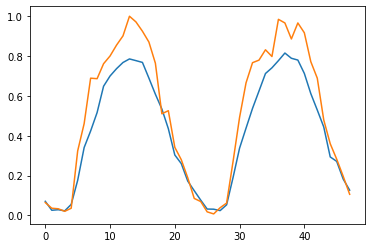

0.04199552536010742
Epoch 1/50
10/10 [==============================] - 11s 1s/step - loss: 0.2435
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2218
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.279 - 0s 6ms/step - loss: 0.2009
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1798
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1595
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1409
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1248
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1089
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0951
Epoch 10/50
10/10 [==============================] - ETA: 0s - loss: 0.081 - 0s 6ms/step - loss: 0.0818
Epoch 11/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0697
Epoch 12/50
10/10 [==============================] - 0s 6ms/s

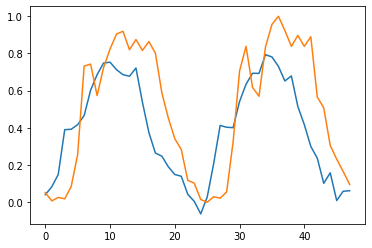

0.012998819351196289
Epoch 1/50
10/10 [==============================] - 10s 972ms/step - loss: 0.2331
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2160
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1964
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1733
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1497
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1262
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1061
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0890
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0753
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0642
Epoch 11/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0546
Epoch 12/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0472
Epoch 13/50
10/10 [======

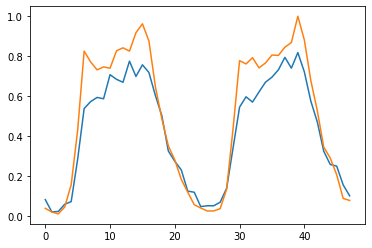

In [1735]:
LSTM_forecast(df, days_in_past=4, days_in_future=2, detectors=detector_sample)

In [1719]:
detector_sample=df["detector_id"].drop_duplicates().sample(3).to_numpy()

In [1718]:
detector_sample

array(['N25/123p1', 'N25/215g1', 'N25/006c1'], dtype=object)

In [1329]:
days_in_future=1
days_in_past=2
midpoint = np.timedelta64(days_in_future * 24, "h")
prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
        (days_in_future + days_in_past)* 24, "h"
    )
dataset_train = dataset[dataset["measurement_end_utc"] <= prediction_start]
dataset_test = dataset[dataset["measurement_end_utc"] > prediction_start]

In [1330]:
train=dataset_train["n_vehicles_in_interval"].to_numpy()
test=dataset_test["n_vehicles_in_interval"].to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.fit_transform(test.reshape(-1, 1))

In [1342]:
days_in_future=1
days_in_past=2
detector_sample=df["detector_id"].drop_duplicates().sample(1).to_numpy()
dataset=df[df["detector_id"]==detector_sample[0]]
prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
        (days_in_future + days_in_past) * 24 , "h"
    )

print(prediction_start)

dataset_train = dataset[dataset["measurement_end_utc"] <= prediction_start]
dataset_test = dataset[dataset["measurement_end_utc"] > prediction_start]

train=dataset_train["n_vehicles_in_interval"].to_numpy()
test=dataset_test["n_vehicles_in_interval"].to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.fit_transform(test.reshape(-1, 1))

X_train, Y_train = create_dataset(train, look_back=24*days_in_past, look_forward=24*days_in_future)
X_test, Y_test = create_dataset(test, look_back=24*days_in_past, look_forward=24*days_in_future)

2020-06-02 00:00:00


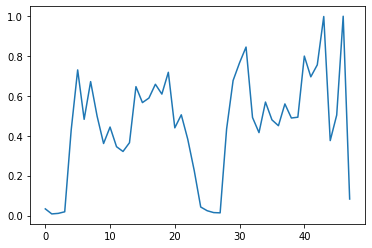

In [1344]:
plt.plot(X_test.flatten())
#plt.show()

In [1588]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=24, look_forward=24):
    dataX, dataY = [], []
    for i in range(0, len(dataset)-look_back-look_forward + 1, look_forward):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        b = dataset[(i+look_back):(i+look_back+look_forward), 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [1589]:
dataset=df[df["detector_id"]==detector_sample[0]]
days_in_future=2
days_in_past=4
midpoint = np.timedelta64(days_in_future * 24, "h")
prediction_start = df["measurement_end_utc"].iloc[-1] - np.timedelta64(
        (days_in_future + days_in_past)* 24, "h"
    )
dataset_train = dataset[dataset["measurement_end_utc"] <= prediction_start]
dataset_test = dataset[dataset["measurement_end_utc"] > prediction_start]

train=dataset_train["n_vehicles_in_interval"].to_numpy()
test=dataset_test["n_vehicles_in_interval"].to_numpy()
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.fit_transform(test.reshape(-1, 1))

X_train, Y_train = create_dataset(train, look_back=days_in_past*24, look_forward=days_in_future*24)
X_test, Y_test = create_dataset(test, look_back=days_in_past*24, look_forward=days_in_future*24)

In [1601]:
test.shape

(144, 1)

In [1594]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [1595]:
look_back=24*4


model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(24*2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 4s - loss: 0.2923
Epoch 2/50
 - 0s - loss: 0.2802
Epoch 3/50
 - 0s - loss: 0.2670
Epoch 4/50
 - 0s - loss: 0.2504
Epoch 5/50
 - 0s - loss: 0.2310
Epoch 6/50
 - 0s - loss: 0.2090
Epoch 7/50
 - 0s - loss: 0.1847
Epoch 8/50
 - 0s - loss: 0.1621
Epoch 9/50
 - 0s - loss: 0.1407
Epoch 10/50
 - 0s - loss: 0.1205
Epoch 11/50
 - 0s - loss: 0.1015
Epoch 12/50
 - 0s - loss: 0.0832
Epoch 13/50
 - 0s - loss: 0.0675
Epoch 14/50
 - 0s - loss: 0.0546
Epoch 15/50
 - 0s - loss: 0.0441
Epoch 16/50
 - 0s - loss: 0.0359
Epoch 17/50
 - 0s - loss: 0.0295
Epoch 18/50
 - 0s - loss: 0.0247
Epoch 19/50
 - 0s - loss: 0.0210
Epoch 20/50
 - 0s - loss: 0.0180
Epoch 21/50
 - 0s - loss: 0.0156
Epoch 22/50
 - 0s - loss: 0.0137
Epoch 23/50
 - 0s - loss: 0.0122
Epoch 24/50
 - 0s - loss: 0.0109
Epoch 25/50
 - 0s - loss: 0.0099
Epoch 26/50
 - 0s - loss: 0.0091
Epoch 27/50
 - 0s - loss: 0.0085
Epoch 28/50
 - 0s - loss: 0.0080
Epoch 29/50
 - 0s - loss: 0.0075
Epoch 30/50
 - 0s - loss: 0.0072
Epoch 31/50
 - 0s -

In [1596]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [ ]:

len(trainPredict.flatten())

In [829]:
testPredict[0]

array([0.08922196, 0.05762103, 0.03720451, 0.0267121 , 0.13929015,
       0.4490122 , 0.70372605, 0.6159996 , 0.57295924, 0.62154424,
       0.68607986, 0.76891404, 0.7603687 , 0.81298935, 0.8088821 ,
       0.83085096, 0.8120059 , 0.76471496, 0.557659  , 0.4897929 ,
       0.35253012, 0.31871244, 0.23270626, 0.13867795], dtype=float32)

array([[0.19486081, 0.08137045, 0.05995717, 0.04710921, 0.07922912,
        0.17987152, 0.30835118, 0.43468951, 0.53319058, 0.66167024,
        0.70235546, 0.77944325, 0.92719486, 0.91862955, 0.9614561 ,
        0.88436831, 0.88865096, 0.80299786, 0.7987152 , 0.75802998,
        0.81156317, 0.64453961, 0.49250535, 0.31477516, 0.23554604,
        0.08993576, 0.03640257, 0.04068522, 0.07066381, 0.17344754,
        0.19057816, 0.19914347, 0.32976445, 0.47109208, 0.62740899,
        0.72376874, 0.68094218, 0.73233405, 0.75374732, 0.73875803,
        0.81584582, 0.6745182 , 0.78372591, 0.72591006, 0.66809422,
        0.57815846, 0.4261242 , 0.26124197, 0.18415418, 0.04496788,
        0.03211991, 0.        , 0.14775161, 0.28479657, 0.54603854,
        0.66381156, 0.59100642, 0.7366167 , 0.8137045 , 0.81798715,
        0.81584582, 0.85010707, 0.92933619, 0.89293362, 0.91862955,
        0.9143469 , 0.76017131, 0.76873662, 0.63383298, 0.53319058,
        0.36616702, 0.23982869, 0.12205567, 0.07

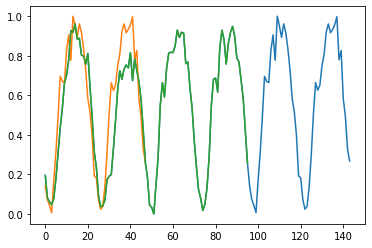

In [1602]:
plt.plot(test.flatten())
plt.plot(Y_test.flatten())
plt.plot(X_test.flatten())
#plt.xlim(0, 200)
X_test[0]

In [715]:
len(train)

595

In [1099]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([Y_test])

ValueError: Found array with dim 3. Estimator expected <= 2.

SyntaxError: invalid syntax (<ipython-input-412-bd5e285e4db3>, line 1)

In [409]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y_train[24:48], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found input variables with inconsistent numbers of samples: [0, 24]

101


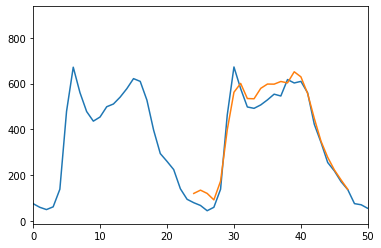

In [414]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_array)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_array)
testPredictPlot[:, :] = np.nan
print(len(testPredict))
#testPredictPlot[len(trainPredict)+(look_back*2)+1+23+23 : len(data_array)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_array))
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.xlim(0, 50)
plt.show()

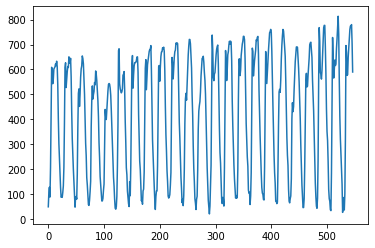

In [291]:
plt.plot(trainPredict)

In [4]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [6]:
import keras

In [7]:
keras.__version__

'2.3.1'

In [10]:
import keras.clear_session

ModuleNotFoundError: No module named 'keras.clear_session'

In [5]:
from keras.backend import clear_session